# 10 Minutes to pandas

## Object Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series


One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. Statistical methods from ndarray have been overridden to automatically exclude missing data (currently represented as NaN).

Operations between Series (+, -, /, , *) align values based on their associated index values– they need not be the same length. The result index will be the sorted union of the two indexes.

In [2]:
s = pd.Series([1,3,5,np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Creating DataFrame

In [3]:
dates = pd.date_range('20130101', periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,0.321671,0.545910,-0.090492,-0.277483
2013-01-02,-0.717796,0.716135,0.454342,0.492844
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238
2013-01-04,1.378328,0.043319,0.647218,1.089262
2013-01-05,-0.292641,-1.347963,-0.463217,-2.179188
2013-01-06,0.417216,0.893882,-1.467116,-0.508218


In [5]:
df2 = pd.DataFrame({
                        'A' : 1,
                        'B' : pd.Timestamp('20130102'),
                        'C' : pd.Series(1, index = list(range(4)), dtype='float32'),
                        'D' : np.array([3] * 4, dtype= 'int32'),
                        'E' : pd.Categorical(["test", "train", "test", "train"]),
                        'F' : 'foo'
})

df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
#df2.<TAB>

## Viewing Data

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.321671,0.545910,-0.090492,-0.277483
2013-01-02,-0.717796,0.716135,0.454342,0.492844
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238
2013-01-04,1.378328,0.043319,0.647218,1.089262
2013-01-05,-0.292641,-1.347963,-0.463217,-2.179188


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.32167149,  0.54590985, -0.09049191, -0.27748315],
       [-0.71779648,  0.71613511,  0.45434218,  0.49284422],
       [ 0.20432912, -1.26040324, -0.92831132, -0.76223801],
       [ 1.37832754,  0.04331922,  0.64721826,  1.08926188],
       [-0.29264059, -1.34796288, -0.46321723, -2.17918764],
       [ 0.41721587,  0.89388203, -1.46711555, -0.50821769]])

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.218518,-0.068187,-0.307929,-0.357503
std,0.711821,0.998949,0.811584,1.124961
min,-0.717796,-1.347963,-1.467116,-2.179188
25%,-0.168398,-0.934473,-0.812038,-0.698733
50%,0.263000,0.294615,-0.276855,-0.392850
75%,0.393330,0.673579,0.318134,0.300262
max,1.378328,0.893882,0.647218,1.089262


In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.321671,-0.717796,0.204329,1.378328,-0.292641,0.417216
B,0.545910,0.716135,-1.260403,0.043319,-1.347963,0.893882
C,-0.090492,0.454342,-0.928311,0.647218,-0.463217,-1.467116
D,-0.277483,0.492844,-0.762238,1.089262,-2.179188,-0.508218


In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.277483,-0.090492,0.545910,0.321671
2013-01-02,0.492844,0.454342,0.716135,-0.717796
2013-01-03,-0.762238,-0.928311,-1.260403,0.204329
2013-01-04,1.089262,0.647218,0.043319,1.378328
2013-01-05,-2.179188,-0.463217,-1.347963,-0.292641
2013-01-06,-0.508218,-1.467116,0.893882,0.417216


In [15]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-05,-0.292641,-1.347963,-0.463217,-2.179188
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238
2013-01-04,1.378328,0.043319,0.647218,1.089262
2013-01-01,0.321671,0.545910,-0.090492,-0.277483
2013-01-02,-0.717796,0.716135,0.454342,0.492844
2013-01-06,0.417216,0.893882,-1.467116,-0.508218


## Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

### Getting

In [16]:
df['A'] # Selecting a single column, which yields a Series, equivalent to df.A:

2013-01-01    0.321671
2013-01-02   -0.717796
2013-01-03    0.204329
2013-01-04    1.378328
2013-01-05   -0.292641
2013-01-06    0.417216
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3] # Selecting via [], which slices the rows.

,A,B,C,D
2013-01-01,0.321671,0.545910,-0.090492,-0.277483
2013-01-02,-0.717796,0.716135,0.454342,0.492844
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.717796,0.716135,0.454342,0.492844
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238
2013-01-04,1.378328,0.043319,0.647218,1.089262


### Selection by Label

In [19]:
df.loc[dates[0]] # For getting a cross section using a label:

A    0.321671
B    0.545910
C   -0.090492
D   -0.277483
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
df.loc[:, ['A','B']] # Selecting on a multi-axis by label:

,A,B
2013-01-01,0.321671,0.545910
2013-01-02,-0.717796,0.716135
2013-01-03,0.204329,-1.260403
2013-01-04,1.378328,0.043319
2013-01-05,-0.292641,-1.347963
2013-01-06,0.417216,0.893882


In [21]:
df.loc['20130102':'20130104',['A','B']] # Showing label slicing, both endpoints are included:

,A,B
2013-01-02,-0.717796,0.716135
2013-01-03,0.204329,-1.260403
2013-01-04,1.378328,0.043319


In [22]:
df.loc['20130102',['A','B']] # Reduction in the dimensions of the returned object:

A   -0.717796
B    0.716135
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
df.loc[dates[0],'A'] # For getting a scalar value:

0.32167148507180676

In [24]:
df.at[dates[0],'A'] # For getting fast access to a scalar (equivalent to the prior method):

0.32167148507180676

### Selection by Position

In [25]:
df.iloc[3] # Select via the position of the passed integers:

A    1.378328
B    0.043319
C    0.647218
D    1.089262
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5, 0:2] # By integer slices, acting similar to numpy/python:

,A,B
2013-01-04,1.378328,0.043319
2013-01-05,-0.292641,-1.347963


In [27]:
df.iloc[[1,2,4,],[0,2]] # By lists of integer position locations, similar to the numpy/python style:

,A,C
2013-01-02,-0.717796,0.454342
2013-01-03,0.204329,-0.928311
2013-01-05,-0.292641,-0.463217


In [28]:
df.iloc[1:3,:] # For slicing rows explicitly:

,A,B,C,D
2013-01-02,-0.717796,0.716135,0.454342,0.492844
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238


In [29]:
df.iloc[:, 1:3] # For slicing columns explicitly:

,B,C
2013-01-01,0.545910,-0.090492
2013-01-02,0.716135,0.454342
2013-01-03,-1.260403,-0.928311
2013-01-04,0.043319,0.647218
2013-01-05,-1.347963,-0.463217
2013-01-06,0.893882,-1.467116


In [30]:
df.iloc[1,1] # For getting a value explicitly:

0.7161351112715125

In [31]:
df.iat[1,1] # For getting fast access to a scalar (equivalent to the prior method):

0.7161351112715125

### Boolean Indexing

In [32]:
df[df.A > 0] # Using a single column’s values to select data.

,A,B,C,D
2013-01-01,0.321671,0.545910,-0.090492,-0.277483
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238
2013-01-04,1.378328,0.043319,0.647218,1.089262
2013-01-06,0.417216,0.893882,-1.467116,-0.508218


In [33]:
df[df > 0] # Selecting values from a DataFrame where a boolean condition is met.

,A,B,C,D
2013-01-01,0.321671,0.545910,NaN,NaN
2013-01-02,NaN,0.716135,0.454342,0.492844
2013-01-03,0.204329,NaN,NaN,NaN
2013-01-04,1.378328,0.043319,0.647218,1.089262
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.417216,0.893882,NaN,NaN


In [34]:
df2 = df.copy() # Using the isin() method for filtering:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.204329,-1.260403,-0.928311,-0.762238,two
2013-01-05,-0.292641,-1.347963,-0.463217,-2.179188,four


### Setting

In [35]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6,], index=pd.date_range('20130102', periods = 6)) 
s1

df['F'] = s1

In [36]:
df.at[dates[0],'A'] = 0 # Setting values by label:

In [37]:
df.iat[0,1] = 0 # Setting values by position:

In [38]:
 df.loc[:, 'D'] = np.array([5] * len(df))

In [39]:
df # The result of the prior setting operations.

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.090492,5,NaN
2013-01-02,-0.717796,0.716135,0.454342,5,1.0
2013-01-03,0.204329,-1.260403,-0.928311,5,2.0
2013-01-04,1.378328,0.043319,0.647218,5,3.0
2013-01-05,-0.292641,-1.347963,-0.463217,5,4.0
2013-01-06,0.417216,0.893882,-1.467116,5,5.0


In [40]:
df2 = df.copy() # A where operation with setting.
df2[df2>0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.090492,-5,NaN
2013-01-02,-0.717796,-0.716135,-0.454342,-5,-1.0
2013-01-03,-0.204329,-1.260403,-0.928311,-5,-2.0
2013-01-04,-1.378328,-0.043319,-0.647218,-5,-3.0
2013-01-05,-0.292641,-1.347963,-0.463217,-5,-4.0
2013-01-06,-0.417216,-0.893882,-1.467116,-5,-5.0


## Missing Data

In [41]:
# A where operation with setting.
df1 = df.reindex(index = dates[0:4], columns = list(df.columns)+ ['E'])

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.090492,5,NaN,NaN
2013-01-02,-0.717796,0.716135,0.454342,5,1.0,NaN
2013-01-03,0.204329,-1.260403,-0.928311,5,2.0,NaN
2013-01-04,1.378328,0.043319,0.647218,5,3.0,NaN


In [42]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E


In [43]:
# Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.090492,5,5.0,5.0
2013-01-02,-0.717796,0.716135,0.454342,5,1.0,5.0
2013-01-03,0.204329,-1.260403,-0.928311,5,2.0,5.0
2013-01-04,1.378328,0.043319,0.647218,5,3.0,5.0


In [44]:
# To get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,True
2013-01-02,False,False,False,False,False,True
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Operations in general ***exclude*** missing data

In [45]:
# Performing a descriptive statistic
df.mean()

A    0.164906
B   -0.159172
C   -0.307929
D    5.000000
F    3.000000
dtype: float64

In [48]:
# Same oeration on the other axis
df.mean(1)

2013-01-01    1.227377
2013-01-02    1.290536
2013-01-03    1.003123
2013-01-04    2.013773
2013-01-05    1.379236
2013-01-06    1.968796
Freq: D, dtype: float64

In [50]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.

s = pd.Series([1,3,5,np.nan, 6,8], index = dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.795671,-2.260403,-1.928311,4.0,1.0
2013-01-04,-1.621672,-2.956681,-2.352782,2.0,0.0
2013-01-05,-5.292641,-6.347963,-5.463217,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [52]:
# Applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.090492,5,NaN
2013-01-02,-0.717796,0.716135,0.363850,10,1.0
2013-01-03,-0.513467,-0.544268,-0.564461,15,3.0
2013-01-04,0.864860,-0.500949,0.082757,20,6.0
2013-01-05,0.572220,-1.848912,-0.380460,25,10.0
2013-01-06,0.989435,-0.955030,-1.847576,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.096124
B    2.241845
C    2.114334
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size = 10))

s

0    2
1    6
2    3
3    5
4    3
5    1
6    5
7    0
8    2
9    3
dtype: int32

In [55]:
s.value_counts()

3    3
5    2
2    2
6    1
1    1
0    1
dtype: int64

### String Methods

In [58]:
# Series is equipped with a set of string processing methods in the str attribute that make it easy to 
# operate on each element of the array, # as in the code snippet below. Note that pattern-matching in str generally 
# uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

s = pd.Series(['A','B','C','Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [60]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.504185,-0.074753,1.096793,0.398897
1,-0.733322,0.222185,-1.140025,0.190290
2,-0.325862,0.191859,-1.564933,0.381072
3,0.265690,0.484564,0.799842,1.571261
4,2.301221,-0.049458,0.715624,-0.764135
5,0.545918,1.391434,-1.778625,1.023581
6,0.257610,0.720243,-0.681173,0.985224
7,-1.020116,-0.022730,-0.773661,0.160460
8,-0.434755,0.916143,2.013527,-0.125511
9,1.235591,-0.045899,-0.735630,0.078324


In [63]:
pieces = [df[:3], df[3:7], df[7:]]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,-0.504185,-0.074753,1.096793,0.398897
1,-0.733322,0.222185,-1.140025,0.190290
2,-0.325862,0.191859,-1.564933,0.381072
3,0.265690,0.484564,0.799842,1.571261
4,2.301221,-0.049458,0.715624,-0.764135
5,0.545918,1.391434,-1.778625,1.023581
6,0.257610,0.720243,-0.681173,0.985224
7,-1.020116,-0.022730,-0.773661,0.160460
8,-0.434755,0.916143,2.013527,-0.125511
9,1.235591,-0.045899,-0.735630,0.078324


### Join

SQL style merges. See the Database style joining section.

In [66]:
left = pd.DataFrame({'key': ['foo','foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo','foo'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,foo,2


In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [70]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the Appending section.

In [71]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A','B','C','D'])

df

,A,B,C,D
0,0.378535,-0.822772,-1.627066,0.164092
1,0.491056,0.022763,-0.217032,0.254356
2,0.269545,-1.189303,-2.398750,0.683479
3,1.145871,-0.858896,0.546921,0.643834
4,0.709232,-1.402815,-0.266941,-0.019216
5,-0.760618,1.485485,2.201073,-0.393840
6,1.230549,0.178711,0.128911,1.447090
7,1.068720,1.599793,-0.877998,-0.532325


In [72]:
s = df.iloc[3]

In [73]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.378535,-0.822772,-1.627066,0.164092
1,0.491056,0.022763,-0.217032,0.254356
2,0.269545,-1.189303,-2.398750,0.683479
3,1.145871,-0.858896,0.546921,0.643834
4,0.709232,-1.402815,-0.266941,-0.019216
5,-0.760618,1.485485,2.201073,-0.393840
6,1.230549,0.178711,0.128911,1.447090
7,1.068720,1.599793,-0.877998,-0.532325
8,1.145871,-0.858896,0.546921,0.643834


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the Grouping section.

In [74]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                        'foo', 'bar', 'foo', 'foo'],
                   'B': ['one','one','two','three',
                        'two','two','one','three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)
                  })

In [78]:
df

,A,B,C,D
0,foo,one,0.366640,-0.510658
1,bar,one,0.334453,0.274621
2,foo,two,0.193723,2.064663
3,bar,three,-0.907965,-0.056556
4,foo,two,-0.253379,0.692771
5,bar,two,-0.073326,-0.937733
6,foo,one,-1.339344,0.601632
7,foo,three,-0.723258,-0.421802


In [76]:
# Grouping and then applying the sum() function to the resulting groups
df.groupby('A').sum()

,C,D
A,,
bar,-0.646837,-0.719668
foo,-1.755618,2.426606


In [79]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.334453  0.274621
    three -0.907965 -0.056556
    two   -0.073326 -0.937733
foo one   -0.972704  0.090974
    three -0.723258 -0.421802
    two   -0.059656  2.757434

## Reshaping

See the sections on Hierarchical Indexing and Reshaping

### Stack

In [80]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                   'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))

In [85]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [81]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [82]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])

In [83]:
df2 = df[:4]

In [84]:
df2

A         B
first second                    
bar   one     0.385256 -0.902627
      two     0.271801 -0.921115
baz   one    -0.292219 -0.817803
      two    -2.455722  0.413908

In [86]:
# The stack() method “compresses” a level in the DataFrame’s columns.

In [87]:
stacked = df2.stack()

In [88]:
stacked

first  second   
bar    one     A    0.385256
               B   -0.902627
       two     A    0.271801
               B   -0.921115
baz    one     A   -0.292219
               B   -0.817803
       two     A   -2.455722
               B    0.413908
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [89]:
stacked.unstack()

A         B
first second                    
bar   one     0.385256 -0.902627
      two     0.271801 -0.921115
baz   one    -0.292219 -0.817803
      two    -2.455722  0.413908

In [90]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.385256  0.271801
      B -0.902627 -0.921115
baz   A -0.292219 -2.455722
      B -0.817803  0.413908

In [91]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.385256 -0.292219
       B -0.902627 -0.817803
two    A  0.271801 -2.455722
       B -0.921115  0.413908

### Pivot Tables

In [92]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [93]:
df

,A,B,C,D,E
0,one,A,foo,-0.238435,1.237718
1,one,B,foo,-1.254374,0.534781
2,two,C,foo,-0.196243,-0.843987
3,three,A,bar,0.096745,0.608753
4,one,B,bar,-0.064407,-1.054461
5,one,C,bar,0.054842,-2.057069
6,two,A,foo,-0.510969,-0.425782
7,three,B,foo,0.311896,-0.741385
8,one,C,foo,-0.751872,-0.428621
9,one,A,bar,0.570744,-1.102826


In [94]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.570744 -0.238435
      B -0.064407 -1.254374
      C  0.054842 -0.751872
three A  0.096745       NaN
      B       NaN  0.311896
      C  0.243041       NaN
two   A       NaN -0.510969
      B  1.687793       NaN
      C       NaN -0.196243

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [95]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [96]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)

In [97]:
ts.resample('5min').sum()

2012-01-01    23984
Freq: 5T, dtype: int32

In [98]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [99]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [100]:
ts

2012-03-06    0.528049
2012-03-07   -1.031943
2012-03-08   -0.054295
2012-03-09   -0.489662
2012-03-10   -0.424765
Freq: D, dtype: float64

In [101]:
ts_utc = ts.tz_localize('UTC')

In [102]:
ts_utc

2012-03-06 00:00:00+00:00    0.528049
2012-03-07 00:00:00+00:00   -1.031943
2012-03-08 00:00:00+00:00   -0.054295
2012-03-09 00:00:00+00:00   -0.489662
2012-03-10 00:00:00+00:00   -0.424765
Freq: D, dtype: float64

In [103]:
# Converting to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.528049
2012-03-06 19:00:00-05:00   -1.031943
2012-03-07 19:00:00-05:00   -0.054295
2012-03-08 19:00:00-05:00   -0.489662
2012-03-09 19:00:00-05:00   -0.424765
Freq: D, dtype: float64

In [105]:
# Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [106]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [107]:
ts

2012-01-31    0.329098
2012-02-29    0.892651
2012-03-31   -1.459952
2012-04-30   -0.647841
2012-05-31   -1.249009
Freq: M, dtype: float64

In [108]:
ps = ts.to_period()

In [109]:
ps

2012-01    0.329098
2012-02    0.892651
2012-03   -1.459952
2012-04   -0.647841
2012-05   -1.249009
Freq: M, dtype: float64

In [110]:
ps.to_timestamp()

2012-01-01    0.329098
2012-02-01    0.892651
2012-03-01   -1.459952
2012-04-01   -0.647841
2012-05-01   -1.249009
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [111]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [112]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [113]:
ts.index = (prng.asfreq('M','e')+1).asfreq('H', 's') + 9

In [114]:
ts.head()

1990-03-01 09:00   -1.043420
1990-06-01 09:00    0.433400
1990-09-01 09:00    0.939338
1990-12-01 09:00   -2.014212
1991-03-01 09:00   -0.221662
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [115]:
df = pd.DataFrame({"id": [1,2,3,4,5,6], "raw_grade": ['a','b','b','a','a','e']})

In [117]:
# Convert the raw grades to a categorical data type.

df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [118]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [119]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [120]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [121]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by = "grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [122]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [123]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))

In [124]:
ts = ts.cumsum()

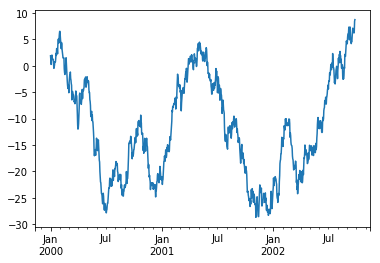

In [125]:
ts.plot()

In [126]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [127]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

<Figure size 432x288 with 0 Axes>

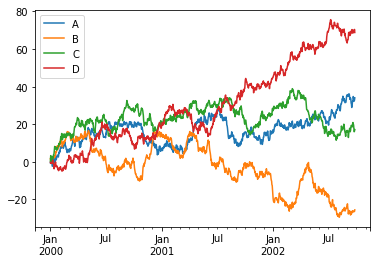

In [128]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV

In [129]:
df.to_csv('foo.csv')

In [131]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.534049,1.668819,0.298304,-0.353085
1,2000-01-02,0.223866,0.725054,3.272961,-0.882610
2,2000-01-03,0.470195,2.107564,2.014935,-0.823983
3,2000-01-04,-0.387431,0.151933,-0.357404,-0.622115
4,2000-01-05,-0.196870,0.875094,0.414631,-0.793098
5,2000-01-06,-0.873057,0.607696,0.174129,-0.770395
6,2000-01-07,-2.352236,1.315027,-0.275237,-0.496254
7,2000-01-08,-2.268342,1.821636,1.433221,0.773503
8,2000-01-09,-2.338637,2.677401,2.744085,0.693818
9,2000-01-10,-1.589753,2.498425,2.086270,-1.104794


In [132]:
df.to_hdf('foo.h5', 'df')

In [133]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.534049,1.668819,0.298304,-0.353085
2000-01-02,0.223866,0.725054,3.272961,-0.882610
2000-01-03,0.470195,2.107564,2.014935,-0.823983
2000-01-04,-0.387431,0.151933,-0.357404,-0.622115
2000-01-05,-0.196870,0.875094,0.414631,-0.793098
2000-01-06,-0.873057,0.607696,0.174129,-0.770395
2000-01-07,-2.352236,1.315027,-0.275237,-0.496254
2000-01-08,-2.268342,1.821636,1.433221,0.773503
2000-01-09,-2.338637,2.677401,2.744085,0.693818
2000-01-10,-1.589753,2.498425,2.086270,-1.104794


### Excel

In [135]:
df.to_excel('foo.xlsx', sheet_name = 'Sheet1')

In [136]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col = None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.534049,1.668819,0.298304,-0.353085
2000-01-02,0.223866,0.725054,3.272961,-0.882610
2000-01-03,0.470195,2.107564,2.014935,-0.823983
2000-01-04,-0.387431,0.151933,-0.357404,-0.622115
2000-01-05,-0.196870,0.875094,0.414631,-0.793098
2000-01-06,-0.873057,0.607696,0.174129,-0.770395
2000-01-07,-2.352236,1.315027,-0.275237,-0.496254
2000-01-08,-2.268342,1.821636,1.433221,0.773503
2000-01-09,-2.338637,2.677401,2.744085,0.693818
2000-01-10,-1.589753,2.498425,2.086270,-1.104794
